In [2]:
!pip install pandas numpy seaborn matplotlib

# Proyek Analisis Data: Analisis Pola Penyewaan Sepeda di Kota Bengkulu
- Nama: Cadila Septi Natalia Panjaitan
- Email: cadila.natalia27@gmail.com
- Id Dicoding:Cadila Septi Natalia Panjaitan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Menentukan Pertanyaan Bisnis

- Berapa banyak jumlah penyewaan sepeda di antara hari libur atau weekend dan hari kerja?
- Bagaimana intensitas penyewaan sepeda berdasarkan cuaca? dan mana cuaca dengan intensitas penyewaan sepeda terbanyak?

## Menyiapkan semua library yang dibutuhkan

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [8]:
data_harian = pd.read_csv("/content/data/day.csv")


In [9]:
# Menampilkan data dalam dataset hours
data_perjam = pd.read_csv("data/hour.csv")

### Assessing Data

#### Assesing Data "Days"

In [10]:
data_harian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
data_harian.isna().sum() # Melakukan pengecekan apabila terdapat missing value pada data days

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
data_harian.describe() # Mengecek parameter statistikanya

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
# Cek Duplikasi
print("Jumlah Duplikasi: ", data_harian.duplicated().sum())

Jumlah Duplikasi:  0


#### Assesing Data "Hours"

In [14]:
data_perjam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
data_perjam.isna().sum() # Melakukan pengecekan apabila terdapat missing value atau data yang hilang pada data hours

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [16]:
data_perjam.describe() # Mengecek parameter statistikanya

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [17]:
# Cek Duplikasi
print("Jumlah Duplikasi: ", data_perjam.duplicated().sum())

Jumlah Duplikasi:  0


### Cleaning Data

In [18]:
# Karena dteday memiliki tipe data object pada data days, maka perlu mengubahnya menjadi tipe data datetime
# Walaupun dalam analisis ini, saya tidak menggunakan kolom ini, tetapi perlu disiapkan untuk kebutuhan di masa mendatang.
data_harian['dteday'] = pd.to_datetime(data_harian['dteday'])
data_harian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
# Karena dteday memiliki tipe data object pada data hours, maka perlu mengubahnya menjadi tipe data datetime
# Walaupun dalam analisis ini, saya tidak menggunakan kolom ini, tetapi perlu disiapkan untuk kebutuhan di masa mendatang.
data_perjam['dteday'] = pd.to_datetime(data_perjam['dteday'])
data_perjam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore days_df

In [20]:
data_harian.describe(include='all') # Mengecek keseluruhan parameter statistik

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [21]:
# Dari parameter diatas, saya menggunakan hanya 4 kolom, yakni holiday, workingday, weathersit, dan cnt
# Persebaran data days_df untuk kolom workingday
user_count_workingday = data_harian.groupby(by="workingday").instant.nunique().sort_values(ascending=False) # 1 hari kerja, 0 weekend atau holiday
print(user_count_workingday)

workingday
1    500
0    231
Name: instant, dtype: int64


In [22]:
# Persebaran data days_df untuk kolom holiday
user_count_holiday = data_harian.groupby(by="holiday").instant.nunique().sort_values(ascending=False)
print(user_count_holiday)

holiday
0    710
1     21
Name: instant, dtype: int64


In [23]:
# Menghitung total sepeda yang disewakan termasuk pengguna casual atau pengguna terdaftar pada hari kerja
rental_workingdays = data_harian[data_harian["workingday"] == 1]
count_rental_workingdays = rental_workingdays["cnt"].sum()
print(count_rental_workingdays)

2292410


In [24]:
# Menghitung total sepeda yang disewakan termasuk pengguna casual atau pengguna terdaftar pada hari weekend atau holiday
rental_wekholdays = data_harian[data_harian["workingday"] == 0]
count_rental_wekholdays = rental_wekholdays["cnt"].sum()
print(count_rental_wekholdays)

1000269


In [25]:
# Menghitung total sepeda yang disewakan termasuk pengguna casual atau pengguna terdaftar pada hari libur
rental_holidays = data_harian[data_harian["holiday"] == 1]
count_rental_holidays = rental_holidays["cnt"].sum()
print(count_rental_holidays)

78435


In [26]:
# Menghitung total sepeda yang disewakan termasuk pengguna casual atau pengguna terdaftar tidak pada hari libur
rental_unholidays = data_harian[data_harian["holiday"] == 0]
count_rental_unholidays = rental_unholidays["cnt"].sum()
print(count_rental_unholidays)

3214244


In [27]:
# Menhitung total sepeda yang disewakan berdasarkan cuaca
rental_wetherdays = data_harian.groupby("weathersit")["cnt"].sum()
print(rental_wetherdays)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64


### Explore hours_df

In [28]:
data_perjam.describe(include='all') # Mengecek keseluruhan parameter statistik

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [29]:
# Persebaran pengguna data hours_day untuk kolom workingday
user_count_workinghours = data_perjam.groupby(by="workingday").instant.nunique().sort_values(ascending=False) # 1 hari kerja, 0 weekend atau holiday
print(user_count_workinghours)

workingday
1    11865
0     5514
Name: instant, dtype: int64


In [30]:
# Persebaran pengguna data hours_day untuk kolom holiday
user_count_holihour = data_perjam.groupby(by="holiday").instant.nunique().sort_values(ascending=False) # 1 hari kerja, 0 weekend atau holiday
print(user_count_holihour)

holiday
0    16879
1      500
Name: instant, dtype: int64


#### Workingday

In [31]:
# Menghitung total sepeda yang disewakan termasuk pengguna casual atau pengguna terdaftar pada hari kerja (hours)
rental_workinghours = data_perjam[data_perjam["workingday"] == 1]
count_rental_workinghours = rental_workinghours["cnt"].sum()
print(count_rental_workinghours)

2292410


In [32]:
# Menghitung total sepeda yang disewakan termasuk pengguna casual atau pengguna terdaftar pada hari weekend atau holiday (hours)
rental_unworkinghours = data_perjam[data_perjam["workingday"] == 0]
count_rental_unworkinghours = rental_unworkinghours["cnt"].sum()
print(count_rental_unworkinghours)

1000269


#### Holiday

In [33]:
# Menghitung total sepeda yang disewakan termasuk pengguna casual atau pengguna terdaftar pada hari holiday (hours)
rental_holihours = data_perjam[data_perjam["holiday"] == 1]
count_rental_holihours = rental_holihours["cnt"].sum()
print(count_rental_holihours)

78435


In [34]:
# Menghitung total sepeda yang disewakan termasuk pengguna casual atau pengguna terdaftar pada bukan hari holiday (hours)
rental_unholihours = data_perjam[data_perjam["holiday"] == 0]
count_rental_unholihours = rental_unholihours["cnt"].sum()
print(count_rental_unholihours)

3214244


In [35]:
workinghours = data_perjam.groupby("workingday")["cnt"].sum()
print(workinghours)

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


In [36]:
holihours = data_perjam.groupby("holiday")["cnt"].sum()
print(holihours)

holiday
0    3214244
1      78435
Name: cnt, dtype: int64


#### Weather

In [37]:
weatherhours = data_perjam.groupby("weathersit")["cnt"].sum()
print(weatherhours)

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa intensitas penyewaan sepeda di antara hari libur atau weekend dan hari kerja?

In [38]:
# Definisi user_count_workinghours
user_count_workinghours = data_perjam.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

# Definisi user_count_holihour
user_count_holihour = data_perjam.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

#### Pengguna Days

Text(0, 0.5, 'Jumlah Pengguna')

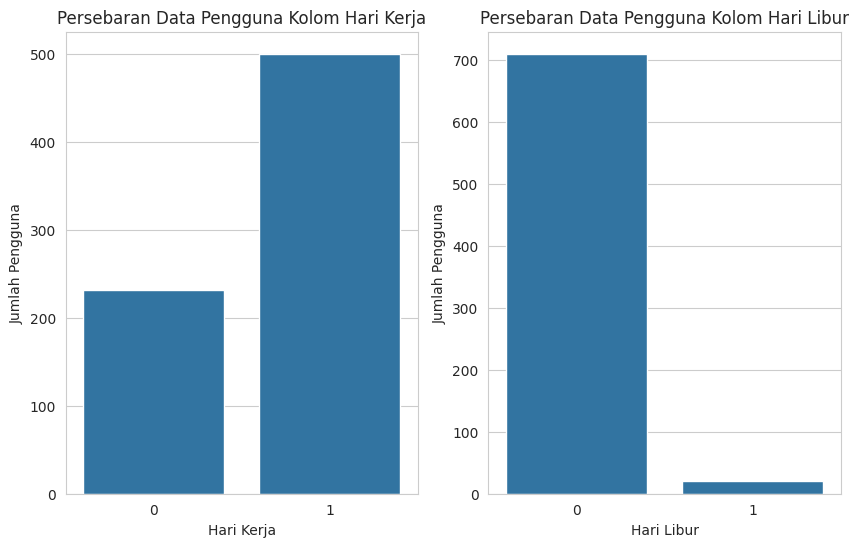

In [47]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Barplot untuk workingday
sns.barplot(x=user_count_workingday.index, y=user_count_workingday.values, ax=axes[0])
axes[0].set_title('Persebaran Data Pengguna Kolom Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna')

# Barplot untuk holiday
sns.barplot(x=user_count_holiday.index, y=user_count_holiday.values, ax=axes[1])
axes[1].set_title('Persebaran Data Pengguna Kolom Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna')

#### Pengguna Hours

Text(0, 0.5, 'Jumlah Pengguna')

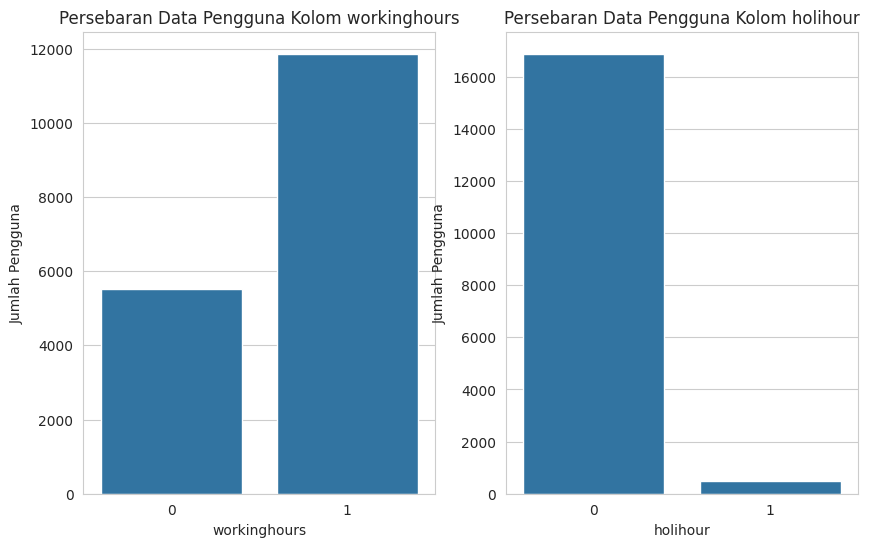

In [48]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Barplot untuk workingday
sns.barplot(x=user_count_workinghours.index, y=user_count_workinghours.values, ax=axes[0])
axes[0].set_title('Persebaran Data Pengguna Kolom Jam Kerja')
axes[0].set_xlabel('Jam Kerja')
axes[0].set_ylabel('Jumlah Pengguna')

# Barplot untuk holiday
sns.barplot(x=user_count_holihour.index, y=user_count_holihour.values, ax=axes[1])
axes[1].set_title('Persebaran Data Pengguna Kolom Jam Libur')
axes[1].set_xlabel('Jam Libur')
axes[1].set_ylabel('Jumlah Pengguna')

#### Rental Workingdays & Holidays

Text(0, 0.5, 'Jumlah Rental')

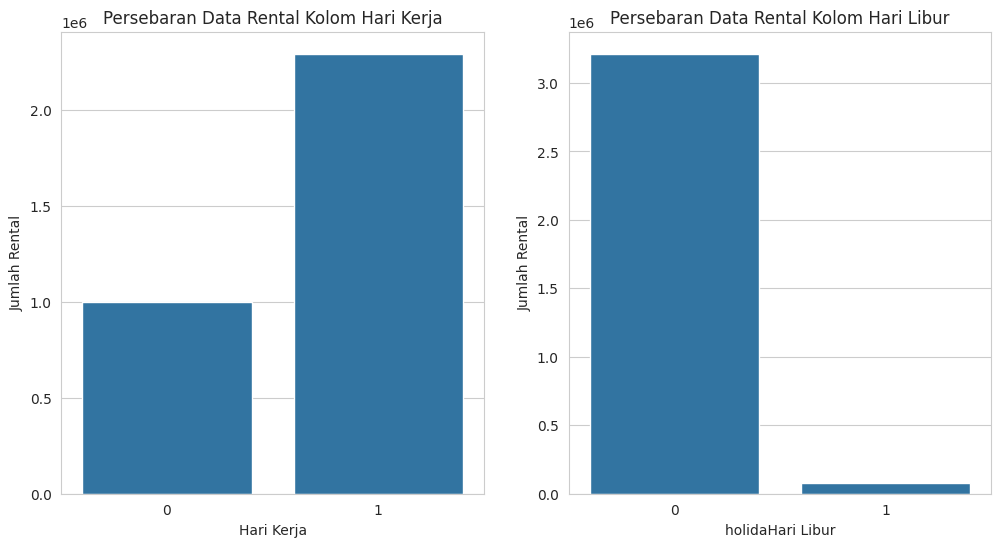

In [49]:
rental_count_workingdays = data_harian.groupby("workingday")["cnt"].sum()
rental_count_holiday = data_harian.groupby("holiday")["cnt"].sum()

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Barplot untuk workingday
sns.barplot(x=rental_count_workingdays.index, y=rental_count_workingdays.values, ax=axes[0])
axes[0].set_title('Persebaran Data Rental Kolom Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Rental')

# Barplot untuk holiday
sns.barplot(x=rental_count_holiday.index, y=rental_count_holiday.values, ax=axes[1])
axes[1].set_title('Persebaran Data Rental Kolom Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Rental')

#### Rental Workinghours & Holihours

Text(0, 0.5, 'Jumlah Rental')

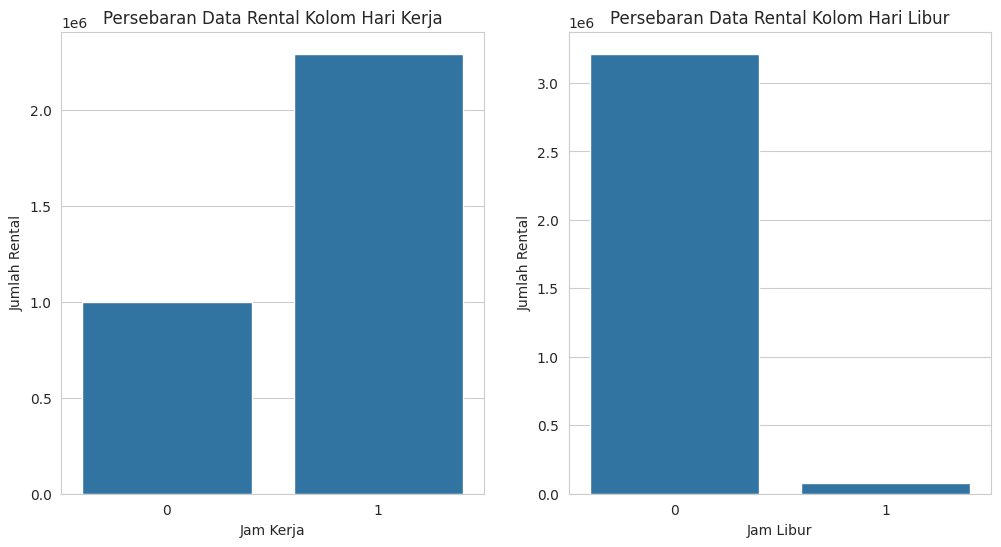

In [50]:
rental_count_workinghours = data_perjam.groupby("workingday")["cnt"].sum()
rental_count_holihours = data_perjam.groupby("holiday")["cnt"].sum()

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


# Barplot untuk workingday
sns.barplot(x=rental_count_workinghours.index, y=rental_count_workinghours.values, ax=axes[0])
axes[0].set_title('Persebaran Data Rental Kolom Hari Kerja')
axes[0].set_xlabel('Jam Kerja')
axes[0].set_ylabel('Jumlah Rental')

# Barplot untuk holiday
sns.barplot(x=rental_count_holihours.index, y=rental_count_holihours.values, ax=axes[1])
axes[1].set_title('Persebaran Data Rental Kolom Hari Libur')
axes[1].set_xlabel('Jam Libur')
axes[1].set_ylabel('Jumlah Rental')

### Pertanyaan 2: Bagaimana intensitas penyewaan sepeda berdasarkan cuaca? dan mana cuaca dengan intensitas penyewaan sepeda terbanyak?

In [43]:
# Definisi rental_wetherdays
rental_wetherdays = data_harian.groupby("weathersit")["cnt"].sum()

# Definisi weatherhours
weatherhours = data_perjam.groupby("weathersit")["cnt"].sum()

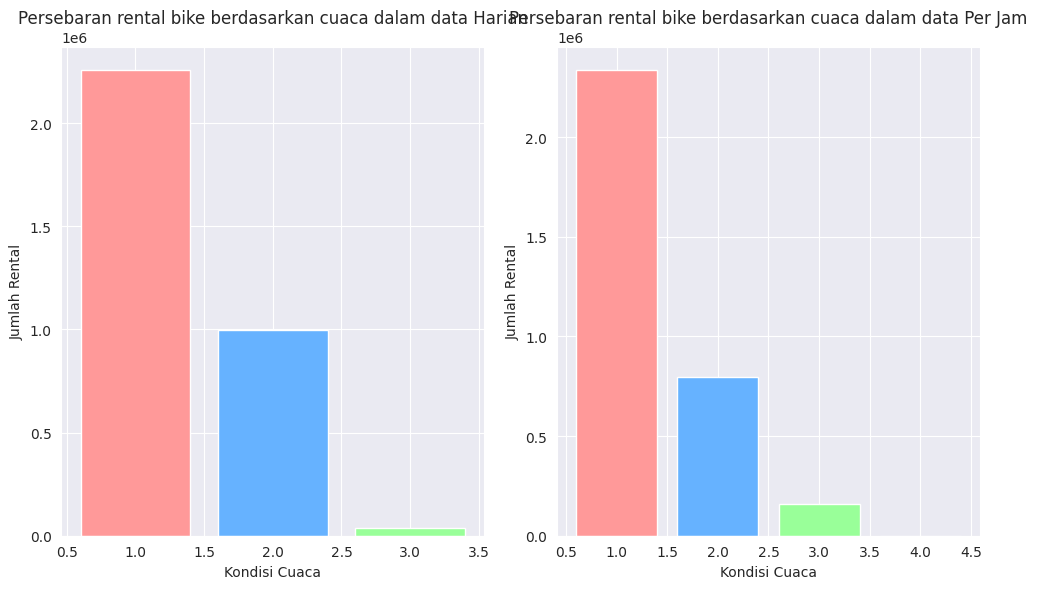

In [51]:
# Set style
sns.set_style("darkgrid")


fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Definisi color
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Bar chart untuk workingday
axes[0].bar(rental_wetherdays.index, rental_wetherdays.values, color=colors[:len(rental_wetherdays)])
axes[0].set_title('Persebaran rental bike berdasarkan cuaca dalam data Harian')
axes[0].set_xlabel('Kondisi Cuaca')
axes[0].set_ylabel('Jumlah Rental')

# Bar chart untuk holiday
axes[1].bar(weatherhours.index, weatherhours.values, color=colors[:len(weatherhours)])
axes[1].set_title('Persebaran rental bike berdasarkan cuaca dalam data Per Jam')
axes[1].set_xlabel('Kondisi Cuaca')
axes[1].set_ylabel('Jumlah Rental')

plt.tight_layout()
plt.show()

## Conclusion

- conclution pertanyaan 1 = Saya menentukan variabel jumlah pengguna dan jumlah rental sepeda. Dengan masing-masing diambil dari data days dan hours, walaupun saya bisa mengambil salah satu dataset saja, namun saya ingin memperkaya informasi. Untuk data days, bisa dilihat bahwa jumlah pengguna pada hari kerja jauh lebih banyak dibandingkan hari weekend atau holidays. Lalu, rental sepeda yang dilakukan pada hari kerja juga memiliki intensitas yang tinggi dibandingkan dengan hari sebaliknya. Saya juga menggunakan kolom holidays, walaupun saya tau ini tidak berimbang karena jumlah holidays sangat sedikit yang akan menimbulkan bias, tetapi dilihat dari persebaran data. Baik jumlah pengguna dan jumlah rental sepeda memiliki intensitas yang rendah pada hari libur. Lalu, hasil yang sama juga dilalui untuk data hours. Yakni perseberan data dengan jumlah pengguna dan jumlah penyewaan sepeda memiliki intensitas yang tinggi pada hari kerja dibandingkan sebaliknya.
- conclution pertanyaan 2 = Saya menjawab pertanyaan kedua dengan menghitung jumnlah total pengguna berdasarkan cuaca. Untuk data pada dataset days, total penyewaan sepeda terbanyak berturut-turut yakni, pada cuaca cerah (1) sebanyak 66.6%, lalu kabut + mendung (2) sebanyak 30.3% dan terakhir salju ringan sebesar 1.2%. Tidak ada pengguna yang menyewa pada cuaca Hujan Lebat + Hujan ES + Badai Petir + Kabut (4). Lalu untuk data pada dataset hours, tidak terlalu berbeda jauh dari komposisinya, yang pertama pada cuaca cerah (1) sebesar 71.0%, lalu kabut + mendung (2) sebesar 24.2%, kemudian salju ringan (3) 4.8% dan terakhir cuaca Hujan Lebat + Hujan ES + Badai Petir + Kabut sebesar 0,06%.

Notes:
Nomor pada kesimpulan pertanyaan kedua, merujuk kepada karakteristik cuaca yang disediakan dataset.